## Intro to matplotlib

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

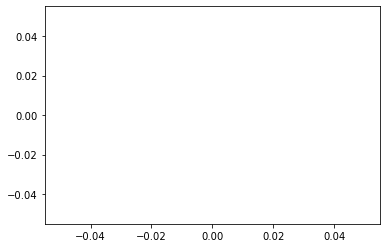

In [59]:
#fastest way to make a plot with plt
#.plot() function creates a blank plot, parameters make adjustments to plot
plt.plot();

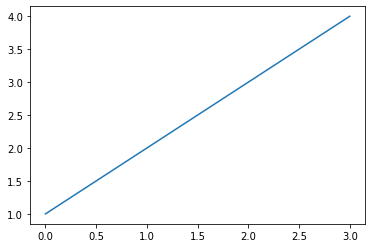

In [60]:
#parameters include x and y axes

plt.plot([1,2,3,4])

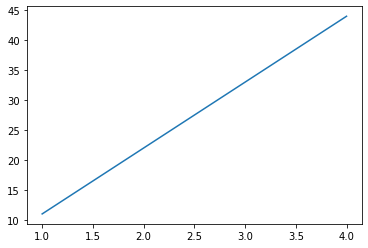

In [61]:
#this way of plotting is referred to as stateless plotting
#plots are also referred to as figures
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

In [62]:
#stateless plotting is less flexible than object-oriented plotting


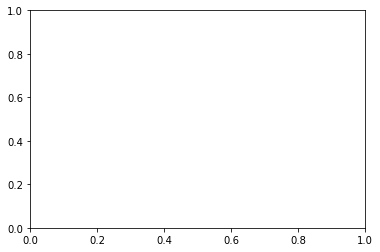

In [63]:
# 1st method
fig = plt.figure() #creates a figure
ax = fig.add_subplot() #adds some axes
plt.show()

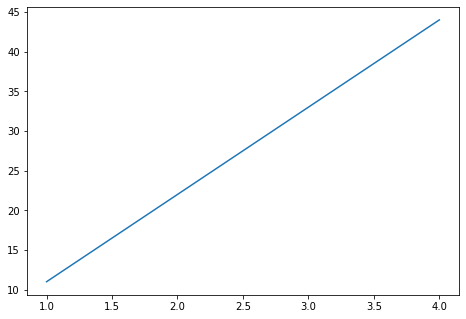

In [64]:
#2nd method
fig = plt.figure() # create a figure
ax = fig.add_axes([1,1,1,1]) #adds axes'
ax.plot(x,y)


## 3rd method - Recommended usage

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

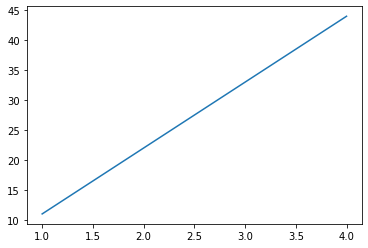

In [65]:
fig, ax = plt.subplots()
ax.plot(x,y);

#object oriented, figure and axes objects
type(fig),type(ax)

##  Matplotlib example workflow

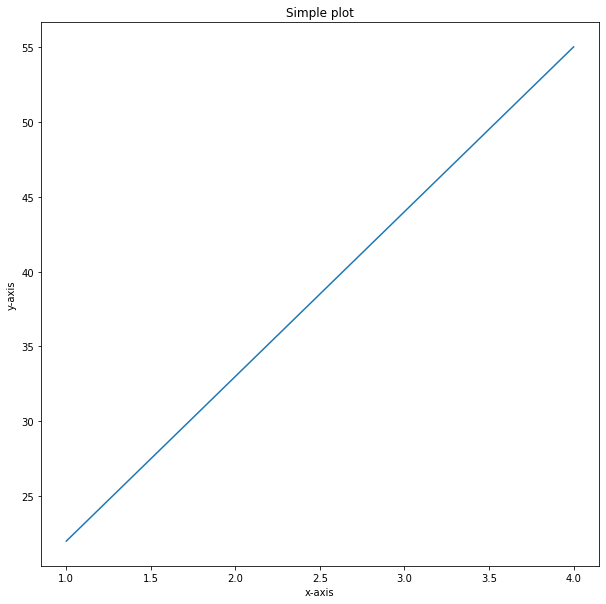

In [66]:
# 0. import matplotlib and get ready for jupyter
%matplotlib inline
import matplotlib.pyplot as plt

#1. prepare data
x = [1,2,3,4]
y = [22,33,44,55]

#2. setup plot
fig, ax = plt.subplots(figsize=(10,10))#figsize is the width, height of plot

#3. plot data
ax.plot(x,y)

#4. customize plots
ax.set(title="Simple plot",
      xlabel="x-axis",
      ylabel="y-axis")
#5. save and display
fig.savefig('images/sample-plot.png')
plt.show();

## Making figures with Numpy arrays
* Line plot
* scatter plot
* bar plot
* histogram
* subplot

In [67]:
#create some data
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

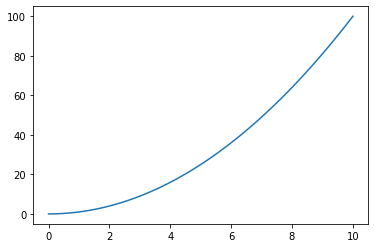

In [68]:
#plot the data
#default plot is a line plot
fig, ax = plt.subplots()
ax.plot(x,x**2);

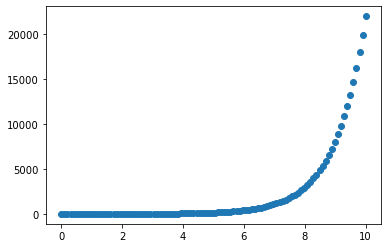

In [69]:
#Use the same data to create a scatter plot
fig, ax = plt.subplots()
ax.scatter(x,np.exp(x));

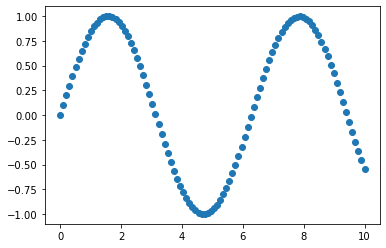

In [70]:
# another scatter plot
fig, ax = plt.subplots()
ax.scatter(x,np.sin(x));

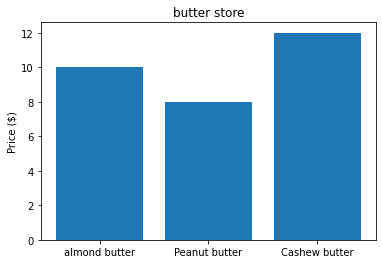

In [71]:
#make a plot from dictionary
butter_prices = {"almond butter": 10,
                "Peanut butter": 8,
                "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(butter_prices.keys(),butter_prices.values());
ax.set(title="butter store", ylabel="Price ($)");

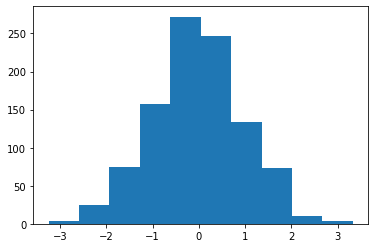

In [72]:
#make some data
x = np.random.randn(1000)
#plot data on histogram
fig, ax = plt.subplots()
ax.hist(x);

## Two Options for Subplots

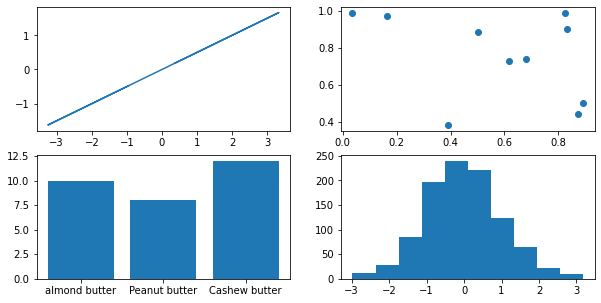

In [73]:
# subplot option 1
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

#plot to each different axis on figure
#an axis on subplot figures are a single graph 
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(butter_prices.keys(), butter_prices.values());
ax4.hist(np.random.randn(1000));

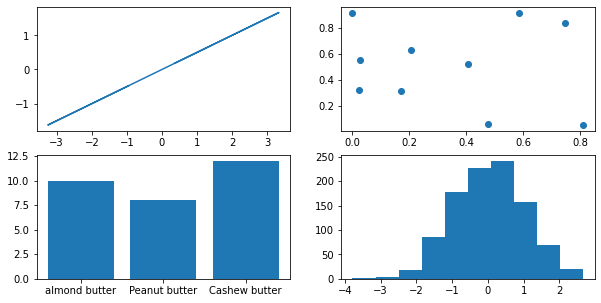

In [74]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,5))
# Plot to each different index
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(butter_prices.keys(), butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [75]:
import pandas as pd


In [76]:
#Make a DataFrame
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<AxesSubplot:>

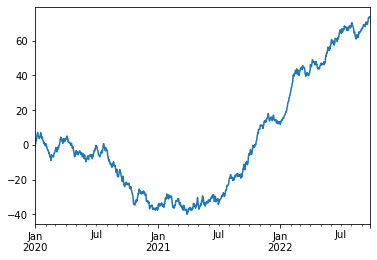

In [77]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("1/1/2020", periods=1000))
#.cumsum returns cumulative sum of series
ts = ts.cumsum()
ts.plot()

In [78]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [79]:
#remove string properties from price column
car_sales["Price"] = car_sales["Price"].str.replace('[$\,\.]', '')

In [80]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000


In [81]:
#remove last two zeros from price column
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [82]:
#add an extra column that has dates for each car sold
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [83]:
#create a new column for total sales, that shows the cumulative sum of the price column
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


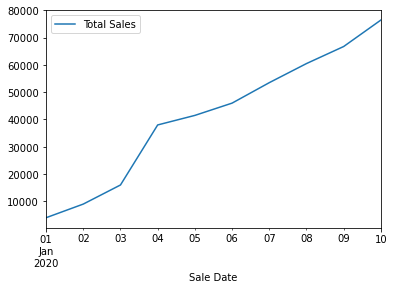

In [84]:
#plot total sales column directly from pandas dataframe
car_sales.plot(x="Sale Date", y="Total Sales");

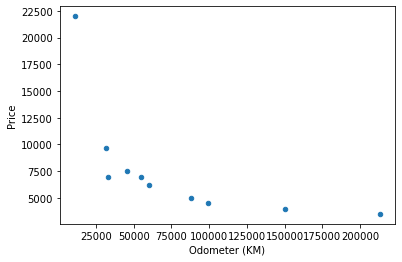

In [87]:
#reassign price column from string to int
car_sales["Price"] = car_sales["Price"].astype(int)
#plot scatter plot with numeric price column
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

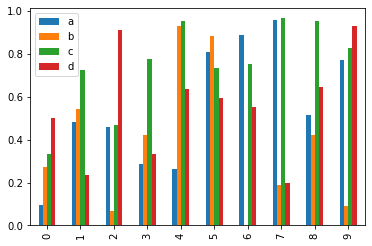

In [88]:
#create a bar graph from pandas dataframe
x = np.random.rand(10,4)
df = pd.DataFrame(x, columns=['a','b','c','d'])
df.plot.bar();

In [92]:
x

array([[0.0949221 , 0.27211206, 0.33273668, 0.50054112],
       [0.48421323, 0.54059722, 0.72375663, 0.23321378],
       [0.46060519, 0.06762706, 0.46983317, 0.91131347],
       [0.28830645, 0.42050761, 0.77775777, 0.33186434],
       [0.26167467, 0.92783251, 0.9544607 , 0.63343924],
       [0.81023015, 0.88093834, 0.73191067, 0.59359356],
       [0.887779  , 0.00183159, 0.75188186, 0.55258165],
       [0.95730747, 0.18933143, 0.96503973, 0.19832761],
       [0.51234025, 0.42044681, 0.95264723, 0.64715108],
       [0.76959268, 0.08932449, 0.8257013 , 0.93101514]])

In [93]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


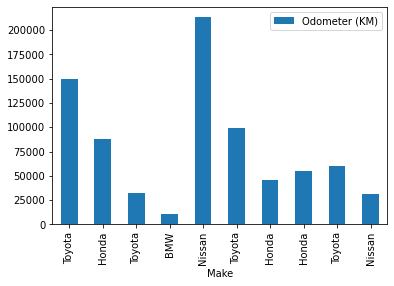

In [94]:
#plot a bar graph with pandas dataframe
car_sales.plot(kind="bar", x="Make", y="Odometer (KM)");

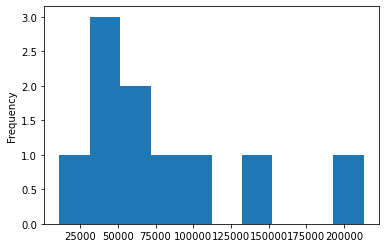

In [96]:
#plot a histogram
#histograms are good for visualizing the spread of data - aka distribution of data
car_sales["Odometer (KM)"].plot(kind='hist');

<AxesSubplot:ylabel='Frequency'>

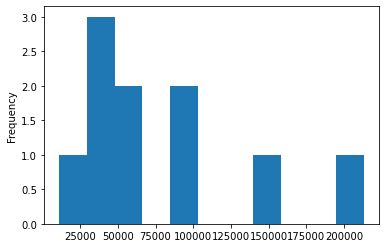

In [100]:
#histograms take the spread of data and categorizes them into bins
#you can manipulate the amount of bins in a historgram
car_sales["Odometer (KM)"].plot(kind='hist', bins=11)
#histograms can be used to find the normal distribution of a dataset

In [101]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:ylabel='Frequency'>

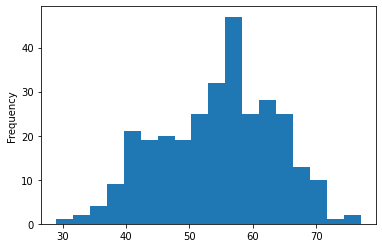

In [103]:
#create a histogram to see distribution of age column
heart_disease['age'].plot(kind='hist',bins=18)

In [104]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


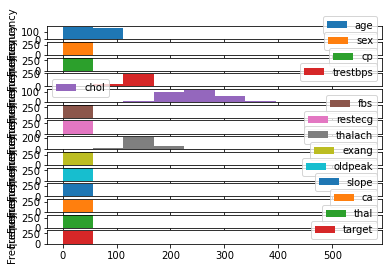

In [105]:
#plot every heart_disease column onto a histogram using subplots
heart_disease.plot.hist(subplots=True);